## Random Sampling and Sample Bias

A sample is a subset of data from a larger data set; statisticians call this larger data set the population. A population in statistics is not the same thing as in biology—it is a large, defined (but sometimes theoretical or imaginary) set of data.<br>

Random sampling is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a simple random sample. Sampling can be done with replacement, in which observations are put back in the population after each draw for possible future reselection. Or it can be done without replacement, in which case observations, once selected, are unavailable for future draws.<br>

Data quality often matters more than data quantity when making an estimate or a model based on a sample. Data quality in data science involves completeness, consistency of format, cleanliness, and accuracy of individual data points. Statistics adds the notion of representativeness.<br>

## Bias

Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process. An important distinction should be made between errors due to random chance and errors due to bias. Consider the physical process of a gun shooting at a target. It will not hit the absolute center of the target every time, or even much at all. An unbiased process will produce error, but it is random and does not tend strongly in any direction

Bias comes in different forms, and may be observable or invisible. When a result does suggest bias (e.g., by reference to a benchmark or actual values), it is often an indicator that a statistical or machine learning model has been misspecified, or an important variable left out.

## Random Selection

Random sampling is not always easy. Proper definition of an accessible population is key. Suppose we want to generate a representative profile of customers and we need to conduct a pilot customer survey. The survey needs to be representative but is labor intensive. <br>

First, we need to define who a customer is. We might select all customer records where purchase amount > 0. Do we include all past customers? Do we include refunds? Internal test purchases? Resellers? Both billing agent and customer? <br>

Next, we need to specify a sampling procedure. It might be “select 100 customers at random.” Where a sampling from a flow is involved (e.g., real-time customer transactions or web visitors), timing considerations may be important (e.g., a web visitor at 10 a.m. on a weekday may be different from a web visitor at 10 p.m. on a weekend). <br>

In stratified sampling, the population is divided up into strata, and random samples are taken from each stratum. Political pollsters might seek to learn the electoral preferences of whites, blacks, and Hispanics. A simple random sample taken from the population would yield too few blacks and Hispanics, so those strata could be overweighted in stratified sampling to yield equivalent sample sizes. <br>

## Size Versus Quality: When Does Size Matter?

In the era of big data, it is sometimes surprising that smaller is better. Time and effort spent on random sampling not only reduces bias but also allows greater attention to data exploration and data quality. For example, missing data and outliers may contain useful information. It might be prohibitively expensive to track down missing values or evaluate outliers in millions of records, but doing so in a sample of several thousand records may be feasible. Data plotting and manual inspection bog down if there is too much data.

- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.

- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.

- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be prohibitively expensive.

## Selection Bias

Selection bias refers to the practice of selectively choosing data—consciously or unconsciously—in a way that leads to a conclusion that is misleading or ephemeral.

If you specify a hypothesis and conduct a well-designed experiment to test it, you can have high confidence in the conclusion. This is frequently not what occurs, however. Often, one looks at available data and tries to discern patterns. But are the patterns real? Or are they just the product of data snooping—that is, extensive hunting through the data until something interesting emerges? There is a saying among statisticians: “If you torture the data long enough, sooner or later it will confess.” <br>

The difference between a phenomenon that you verify when you test a hypothesis using an experiment and a phenomenon that you discover by perusing available data can be illuminated with the following thought experiment. <br>

Imagine that someone tells you they can flip a coin and have it land heads on the next 10 tosses. You challenge them (the equivalent of an experiment), and they proceed to toss the coin 10 times, with all flips landing heads. Clearly you ascribe some special talent to this person—the probability that 10 coin tosses will land heads just by chance is 1 in 1,000. <br>

Now imagine that the announcer at a sports stadium asks the 20,000 people in attendance each to toss a coin 10 times, and to report to an usher if they get 10 heads in a row. The chance that somebody in the stadium will get 10 heads is extremely high (more than 99%—it’s 1 minus the probability that nobody gets 10 heads). Clearly, selecting after the fact the person (or persons) who gets 10 heads at the stadium does not indicate they have any special talent—it’s most likely luck. <br>

Since repeated review of large data sets is a key value proposition in data science, selection bias is something to worry about. A form of selection bias of particular concern to data scientists is what John Elder (founder of Elder Research, a respected data mining consultancy) calls the vast search effect. If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. But is the result you found truly something interesting, or is it the chance outlier? <br>

We can guard against this by using a holdout set, and sometimes more than one holdout set, against which to validate performance. Elder also advocates the use of what he calls target shuffling (a permutation test, in essence) to test the validity of predictive associations that a data mining model suggests. <br>

## Sampling Distribution of a Statistic

The term sampling distribution of a statistic refers to the distribution of some sample statistic over many samples drawn from the same population. Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. We are therefore interested in how different it might be—a key concern is sampling variability. If we had lots of data, we could draw additional samples and observe the distribution of a sample statistic directly. Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available.

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic.

In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [8]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [9]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [10]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)

In [11]:
xsample = stats.norm.rvs(size=1000)

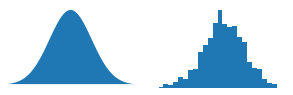

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

In [13]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


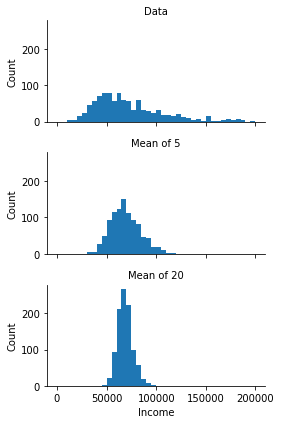

In [14]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

The histogram of the individual data values is broadly spread out and skewed toward higher values, as is to be expected with income data. The histograms of the means of 5 and 20 are increasingly compact and more bell-shaped.

## Central Limit Theorem

The phenomenon we’ve just described is termed the central limit theorem. It says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great. The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference—that is, confidence intervals and hypothesis tests.

The central limit theorem receives a lot of attention in traditional statistics texts because it underlies the machinery of hypothesis tests and confidence intervals, which themselves consume half the space in such texts. Data scientists should be aware of this role; however, since formal hypothesis tests and confidence intervals play a small role in data science, and the bootstrap is available in any case, the central limit theorem is not so central in the practice of data science.

## Standard Error

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation s of the sample values, and the sample size n:

${Standard error} = {SE}$ = $\frac{s}{\sqrt{n}}$

As the sample size increases, the standard error decreases. The relationship between standard error and sample size is sometimes referred to as the square root of n rule: to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.

- Collect a number of brand-new samples from the population.

- For each new sample, calculate the statistic (e.g., mean).

- Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

Collect a number of brand-new samples from the population.

For each new sample, calculate the statistic (e.g., mean).

Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

## The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the bootstrap, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.

In practice, it is not necessary to actually replicate the sample a huge number of times. We simply replace each observation after each draw; that is, we sample with replacement. In this way we effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:

- Draw a sample value, record it, and then replace it.

- Repeat n times.

- Record the mean of the n resampled values.

- Repeat steps 1–3 R times.

- Use the R results to:

     * Calculate their standard deviation (this estimates sample mean standard error).

     * Produce a histogram or boxplot.

     * Find a confidence interval.

In [15]:
from sklearn.utils import resample
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830927


The original estimate of the median is 62,000. The bootstrap distribution indicates that the estimate has a bias of about –82 and a standard error of 229. The results will vary slightly between consecutive runs of the algorithm.

The bootstrap can be used with multivariate data, where the rows are sampled as units. A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. With classification and regression trees (also called decision trees), running multiple trees on bootstrap samples and then averaging their predictions (or, with classification, taking a majority vote) generally performs better than using a single tree. This process is called bagging (short for “bootstrap aggregating”)

## Confidence Intervals

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error in a sample estimate. Confidence intervals are another.

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:

1. Draw a random sample of size n with replacement from the data (a resample).

2. Record the statistic of interest for the resample.

3. Repeat steps 1–2 many (R) times.

4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.

5. The trim points are the endpoints of an x% bootstrap confidence interval.

68760.51844
55734.1


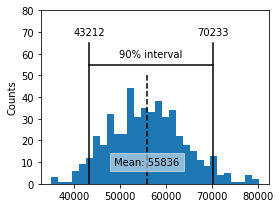

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

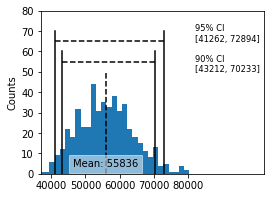

In [20]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. Statistical textbooks and software, with roots in over a half century of computerless statistical analysis, will also reference confidence intervals generated by formulas, especially the t-distribution

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. Statistical textbooks and software, with roots in over a half century of computerless statistical analysis, will also reference confidence intervals generated by formulas, especially the t-distribution

## Normal Distribution

The bell-shaped normal distribution is iconic in traditional statistics. The fact that distributions of sample statistics are often normally shaped has made it a powerful tool in the development of mathematical formulas that approximate those distributions.

### Standard Normal and QQ-Plots

The package scipy has the function (scipy.stats.probplot) to create QQ-plots. The argument dist specifies the distribution, which is set by default to the normal distribution.

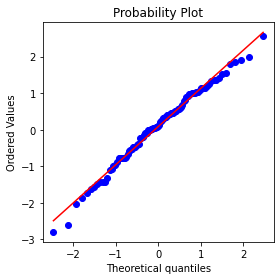

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

- z-score:
The result of standardizing an individual data point.

- Standard normal:
A normal distribution with mean = 0 and standard deviation = 1.

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation; this is also called normalization or standardization. Note that “standardization” in this sense is unrelated to database record standardization (conversion to a common format). The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution.

A QQ-Plot is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

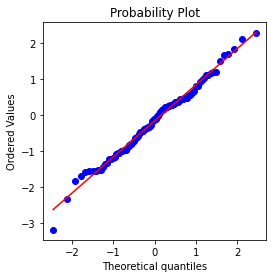

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

**To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation; you can then compare the data to a normal distribution.**

## Long-Tailed Distributions

Despite the importance of the normal distribution historically in statistics, and in contrast to what the name would suggest, data is generally not normally distributed.

While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as with income data; or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the black swan theory, which predicts that anomalous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution.

- Tail:
The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

- Skew:
Where one tail of a distribution is longer than the other.

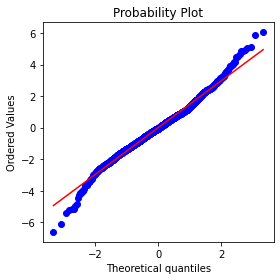

In [23]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

the points are far below the line for low values and far above the line for high values, indicating the data are not normally distributed. This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution.